In [1]:
import matplotlib.pyplot as plt
import ML_lib as ml
import random
import numpy as np

MNIST data set

In [2]:
data_path = "data/MNIST/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [3]:
train_imgs = np.asfarray(train_data[:, 1:]) 
test_imgs = np.asfarray(test_data[:, 1:])
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

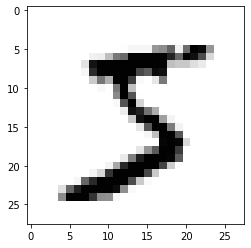

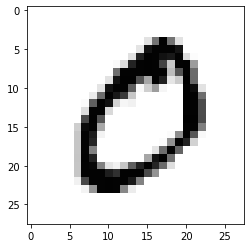

In [4]:
for i in range(2):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [5]:
lr = np.arange(10)

In [6]:
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

In [7]:
MNIST_data=ml.data(train_imgs,train_labels_one_hot,bs=500,normalize=True)

In [105]:
MNIST_model=ml.model(MNIST_data)
MNIST_model.add_Dense(50)
MNIST_model.add_Dense(10,activation='softmax')

In [106]:
MNIST_learn=ml.learner(MNIST_data,MNIST_model,wd=0.0,al_mom=0.95,al_RMS=0.95,global_dropout=0)

In [107]:
MNIST_learn.cycle_learn(0.01,50)

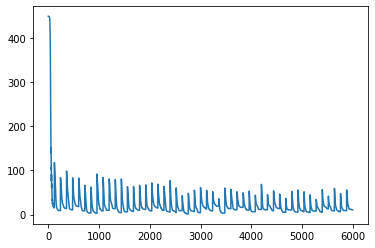

In [108]:
plt.plot(MNIST_learn.LossRec)

In [109]:
preds=MNIST_model.predict(test_imgs.tolist())

In [110]:
mypred=np.argmax(preds,axis=1)

In [111]:
inb=test_labels.T-mypred

In [112]:
len(inb[inb==0])/len(inb[0])

0.9389

In [18]:
0.9515

0.9515